<a href="https://colab.research.google.com/github/Lobanov07/ad_4/blob/main/%D0%9B%D0%A0_4_%D0%9B%D0%BE%D0%B1%D0%B0%D0%BD%D0%BE%D0%B2_%D0%92%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кластеризация


## Часть 1

### Импорт библиотек

In [223]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


## Создание набора данных

In [224]:
def make_data(n, seed):
 np.random.seed(seed)

 shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])

 data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
 data = np.swapaxes(data, 1, 2)
 data = data.reshape((-1, 2))
 data *= np.array([[20, 0.5]])

 df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
 columns=['x', 'y'])
 df = df.sample(frac=1.0)
 return df

df = make_data(n=65, seed=42)
print(df.head(10))
print(df.shape)

              x         y
75   124.549199  4.031087
193  221.847746  1.975212
17    66.284947  2.238947
190  181.939919  1.575197
19    31.753926  1.095753
39    63.937225  1.419357
103  115.092238  4.174200
151  193.242613  0.775958
170  163.420100  1.299390
141  151.282757  1.087251
(195, 2)


## Стандартизация данных

In [225]:
scaler = StandardScaler()

scaled_values = scaler.fit_transform(df[['x', 'y']])

df_scaled = pd.DataFrame(scaled_values, columns=['x_scaled', 'y_scaled'])
print(df_scaled.head(10))

   x_scaled  y_scaled
0  0.096559  0.986320
1  1.896617 -0.369803
2 -0.981350 -0.195835
3  1.158308 -0.633666
4 -1.620186 -0.949923
5 -1.024783 -0.736463
6 -0.078398  1.080722
7  1.367412 -1.160871
8  0.815685 -0.815598
9  0.591140 -0.955531


## Обучение модели для кластеризации методом Kmeans для трёх кластеров

In [226]:
kmeans = KMeans(n_clusters=3, random_state=42)

labels = kmeans.fit_predict(df_scaled.values)

print(labels)

[2 0 1 0 1 1 2 0 0 0 1 1 1 2 2 0 0 1 0 2 1 0 1 2 2 1 0 1 1 1 2 2 1 0 0 0 1
 0 0 1 1 0 2 2 2 2 2 1 2 1 2 1 1 0 0 0 0 1 2 0 2 0 1 2 1 2 1 1 0 1 2 0 0 0
 2 1 0 2 2 1 1 0 2 0 0 2 1 2 0 0 0 0 2 0 2 0 2 1 0 0 0 1 0 2 0 2 0 2 2 2 2
 1 2 0 2 2 2 0 0 0 0 2 0 1 1 2 0 2 2 0 0 2 1 0 1 1 1 2 0 0 1 2 0 2 1 1 2 1
 1 1 2 2 0 0 2 1 1 1 2 1 2 1 1 0 2 2 2 2 0 1 1 2 1 1 2 1 0 1 2 1 2 1 2 1 1
 1 0 1 2 2 0 1 1 0 0]


In [227]:
df_scaled['cluster'] = labels
print(df_scaled.head())

   x_scaled  y_scaled  cluster
0  0.096559  0.986320        2
1  1.896617 -0.369803        0
2 -0.981350 -0.195835        1
3  1.158308 -0.633666        0
4 -1.620186 -0.949923        1


## Визуализация кластеров

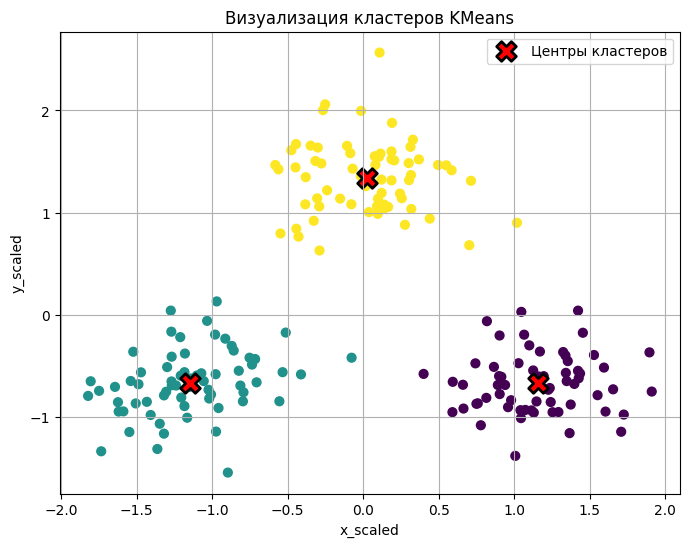

In [228]:
# Используем оба столбца для кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_scaled[['x_scaled', 'y_scaled']])

centers = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))

plt.scatter(
    df_scaled['x_scaled'],
    df_scaled['y_scaled'],
    c=labels,
    cmap='viridis',
    s=40
)

plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c='red',
    s=200,
    marker='X',
    edgecolor='black',
    linewidth=2,
    label='Центры кластеров'
)

plt.title("Визуализация кластеров KMeans")
plt.xlabel("x_scaled")
plt.ylabel("y_scaled")
plt.legend()
plt.grid(True)

plt.show()

## Расчёт коэффиценты силуэта

In [229]:
from sklearn.metrics import silhouette_score
from sklearn import metrics

sil_score = silhouette_score(df_scaled.values, labels)
print("Качество кластеризации по метрике силуэта:", sil_score)

df['cluster'] = labels

# средние значения признаков по кластерам (показывают центры кластеров по признакам)
cluster_means = df.groupby('cluster').mean()
print(cluster_means)

Качество кластеризации по метрике силуэта: 0.7631749443971403
                  x         y
cluster                      
0        181.895363  1.514413
1         57.371092  1.525945
2        120.638901  4.566958


## Анализ

Кластеризация методом KMeans выделила три четко различимые группы объектов. По средним значениям признаков можно сказать, что:

Кластер 0 содержит объекты с высокими значениями признака x (около 181.9) и низкими значениями признака y (около 1.51)

Кластер 1 включает объекты с низкими значениями признака x (около 57.4) и примерно такими же низкими значениями y (около 1.53)

Кластер 2 характеризуется средними значениями признака x (около 120.6) и значительно более высокими значениями признака y (около 4.57)

Таким образом, алгоритм успешно разделил данные на три хорошо различимые группы. Первые два кластера (0 и 1) различаются преимущественно по горизонтальному положению (значениям признака x), при этом кластер 0 содержит объекты с наибольшими значениями x, а кластер 1 - с наименьшими. Третий кластер (2) заметно отличается от остальных по вертикальному положению (значениям признака y), демонстрируя значительно более высокие значения этого признака при средних значениях x.

Очень высокое значение коэффициента силуэта (0.763) свидетельствует о том, что кластеры являются плотными и хорошо отделены друг от друга. Это значение превышает порог в 0.7, что считается отличным результатом и подтверждает, что алгоритм корректно выявил естественные группы в данных. Кластеры имеют четкие границы, а объекты внутри каждого кластера тесно сгруппированы вокруг своих центров.

## Повторение предыдщуих действиий KMeans с 2 и 4 кластерами

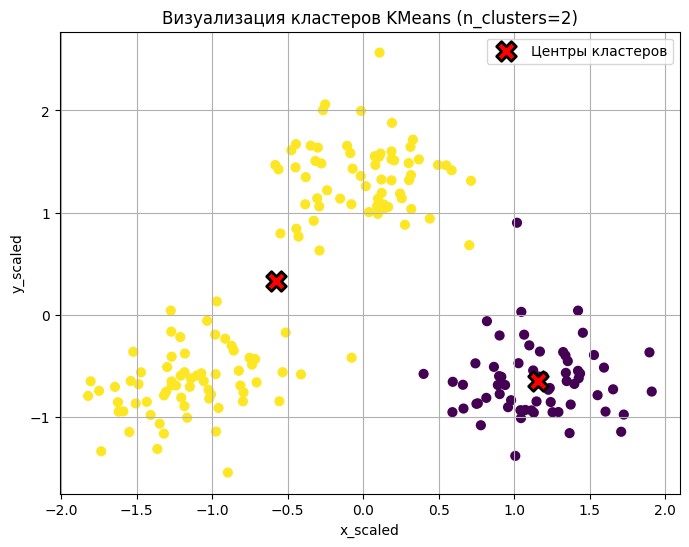

Качество кластеризации по метрике силуэта: 0.488557
Средние значения признаков по кластерам:
                  x         y
cluster                      
0        181.780102  1.551112
1         88.104748  3.028191


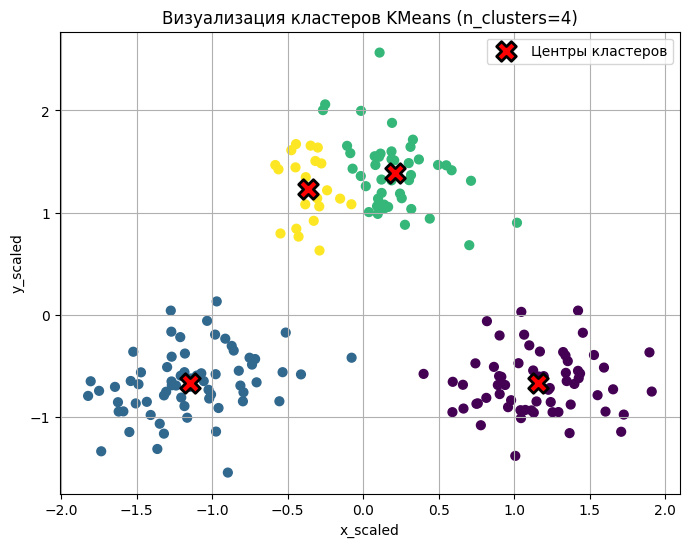

Качество кластеризации по метрике силуэта: 0.589451
Средние значения признаков по кластерам:
                  x         y
cluster                      
0        181.895363  1.514413
1         57.371092  1.525945
2        130.630535  4.644277
3         99.704048  4.404958


In [230]:
def perform_clustering(n_clusters, df, df_scaled):

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(df_scaled[['x_scaled', 'y_scaled']])

    centers = kmeans.cluster_centers_

    plt.figure(figsize=(8, 6))
    plt.scatter(
        df_scaled['x_scaled'],
        df_scaled['y_scaled'],
        c=labels,
        cmap='viridis',
        s=40
    )

    plt.scatter(
        centers[:, 0],
        centers[:, 1],
        c='red',
        s=200,
        marker='X',
        edgecolor='black',
        linewidth=2,
        label='Центры кластеров'
    )

    plt.title(f"Визуализация кластеров KMeans (n_clusters={n_clusters})")
    plt.xlabel("x_scaled")
    plt.ylabel("y_scaled")
    plt.legend()
    plt.grid(True)
    plt.show()

    sil_score = silhouette_score(df_scaled[['x_scaled', 'y_scaled']], labels)
    print(f"Качество кластеризации по метрике силуэта: {sil_score:.6f}")

    df_temp = df.copy()
    df_temp['cluster'] = labels
    cluster_means = df_temp.groupby('cluster').mean()
    print("Средние значения признаков по кластерам:")
    print(cluster_means)

    return sil_score, cluster_means, labels

results = {}
silhouette_scores = {}

sil_score_2, means_2, labels_2 = perform_clustering(2, df, df_scaled)
results[2] = {'means': means_2, 'labels': labels_2}
silhouette_scores[2] = sil_score_2



sil_score_4, means_4, labels_4 = perform_clustering(4, df, df_scaled)
results[4] = {'means': means_4, 'labels': labels_4}
silhouette_scores[4] = sil_score_4



##**Анализ результатов кластеризации**
## Кластеризация с 2 кластерами:
 Качество кластеризации по метрике силуэта: 0.488557

Кластеризация методом KMeans с двумя кластерами разделила объекты на две группы. По средним значениям признаков можно сказать, что:

Кластер 0 содержит объекты с высокими значениями признака x (около 181.8) и низкими значениями признака y (около 1.55)

Кластер 1 включает объекты со средними значениями признака x (около 88.1) и повышенными значениями признака y (около 3.03)

Таким образом, алгоритм разделил данные на две группы, где основное различие происходит по обоим признакам одновременно. Однако умеренное значение коэффициента силуэта (0.489) указывает на то, что разделение не является оптимальным. Кластер 1 объединяет объекты, которые по своей природе могут относиться к разным группам, что снижает качество кластеризации.

## Кластеризация с 4 кластерами:
Качество кластеризации по метрике силуэта: 0.589451

Кластеризация методом KMeans с четырьмя кластерами выделила четыре группы объектов. По средним значениям признаков можно сказать, что:

Кластер 0 содержит объекты с высокими значениями признака x (около 181.9) и низкими значениями признака y (около 1.51)

Кластер 1 включает объекты с низкими значениями признака x (около 57.4) и низкими значениями признака y (около 1.53)

Кластер 2 характеризуется высокими значениями признака x (около 130.6) и очень высокими значениями признака y (около 4.64)

Кластер 3 характеризуется средними значениями признака x (около 99.7) и высокими значениями признака y (около 4.40)

Алгоритм разделил данные на четыре группы, при этом произошло дополнительное разделение группы с высокими значениями y на два отдельных кластера (2 и 3), которые различаются по значениям признака x. Значение коэффициента силуэта (0.589) выше, чем при двух кластерах, но все еще не достигает высоких показателей, что свидетельствует о некотором переобучении и искусственном разделении естественных групп.

##Сравнительный вывод
Наилучшие результаты показывает кластеризация с тремя кластерами (коэффициент силуэта ~0.76), которая была проанализирована ранее. Разделение на два кластера является слишком грубым и объединяет разнородные объекты, а разделение на четыре кластера приводит к излишнему дроблению естественных групп. Три кластера оптимально соответствуют исходной структуре данных, что подтверждается максимальным значением коэффициента силуэта и содержательной интерпретацией результатов.

## График по “методу локтя”

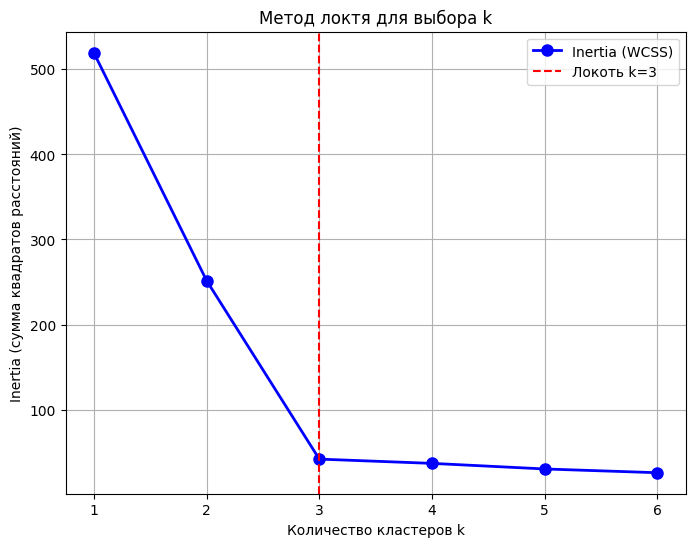

In [231]:
inertia_list = []
K = range(1, 7)  # проверка от 1 до 6 кластеров

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled.values)
    inertia_list.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia_list, 'bo-', linewidth=2, markersize=8, label='Inertia (WCSS)')

# отметка локтя
plt.axvline(x=3, color='red', linestyle='--', label='Локоть k=3')

plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia (сумма квадратов расстояний)')
plt.title('Метод локтя для выбора k')
plt.legend()
plt.grid(True)
plt.show()

Метод локтя показал, что оптимальное количество кластеров для данного набора данных равно трём. При увеличении числа кластеров от одного до трёх суммарная внутренняя дисперсия резко уменьшается, что отражает более точное разделение естественных групп данных на отдельные кластеры. После трёх кластеров дальнейшее увеличение их числа практически не снижает inertia — кривая выравнивается, образуя «локоть» в точке k=3. Это указывает на то, что добавление новых кластеров не приводит к существенному улучшению качества кластеризации и может вызвать переобучение. Таким образом, выбор k=3 является оптимальным для данного набора данных.

## Часть 2

### Вариант №2
Набор данных: employee_attrition.csv
Содержит информацию о сотрудниках:

- age — возраст сотрудника (лет), числовой.
- gender — пол: M / F, категориальный.
- department — департамент: Sales / Engineering / HR / Finance / Support,
категориальный.
- job_level — грейд должности (1–5), целочисленный.
- marital_status — семейное положение: Single / Married / Divorced, категориальный.
- monthly_income — месячный доход, USD/мес, числовой.
- years_at_company — годы в компании, целочисленный.
- overtime — переработки: Yes / No, категориальный.
- performance_rating — оценка эффективности (1–4), целочисленный порядковый.
- distance_from_home_km — расстояние от дома до офиса, км, числовой.
- training_hours_last_year — часы обучения за прошлый год, целочисленный.
- Attrition — целевой класс: 1 — уволился, 0 — остался.


### Загрузка данных

In [232]:
!wget https://raw.githubusercontent.com/Lobanov07/ad_4/main/employee_attrition.csv


--2025-11-30 17:28:41--  https://raw.githubusercontent.com/Lobanov07/ad_4/main/employee_attrition.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159437 (156K) [text/plain]
Saving to: ‘employee_attrition.csv.8’

employee_attrition. 100%[===================>] 155.70K  --.-KB/s    in 0.02s   

2025-11-30 17:28:41 (6.29 MB/s) - ‘employee_attrition.csv.8’ saved [159437/159437]



In [233]:
df = pd.read_csv('employee_attrition.csv.2')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3048 entries, 0 to 3047
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3048 non-null   int64  
 1   gender                    3048 non-null   object 
 2   department                3048 non-null   object 
 3   job_level                 3048 non-null   int64  
 4   marital_status            3048 non-null   object 
 5   monthly_income            3048 non-null   float64
 6   years_at_company          3048 non-null   int64  
 7   overtime                  3048 non-null   object 
 8   performance_rating        3048 non-null   int64  
 9   distance_from_home_km     3048 non-null   float64
 10  training_hours_last_year  3048 non-null   float64
 11  Attrition                 3048 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 285.9+ KB
None


## Предварительная обработка данных

In [234]:
print(df.isnull().sum())

age                         0
gender                      0
department                  0
job_level                   0
marital_status              0
monthly_income              0
years_at_company            0
overtime                    0
performance_rating          0
distance_from_home_km       0
training_hours_last_year    0
Attrition                   0
dtype: int64


### Преобразование категориальных признаков

In [235]:
numeric_features = [
    'age',
    'job_level',
    'monthly_income',
    'years_at_company',
    'performance_rating',
    'distance_from_home_km',
    'training_hours_last_year'
]

categorical_features = [
    'gender',
    'department',
    'marital_status',
    'overtime',
    'Attrition'
]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value',
                              unknown_value=-1), categorical_features)
    ]
)


df_processed = pd.DataFrame(
    preprocessor.fit_transform(df),
    columns=preprocessor.get_feature_names_out()
)

print("Исходный df shape:", df.shape)
print("Обработанный df shape:", df_processed.shape)
print("Исходный df не изменился:")
df_processed.head()

Исходный df shape: (3048, 12)
Обработанный df shape: (3048, 12)
Исходный df не изменился:


,num__age,num__job_level,num__monthly_income,num__years_at_company,num__performance_rating,num__distance_from_home_km,num__training_hours_last_year,cat__gender,cat__department,cat__marital_status,cat__overtime,cat__Attrition
0,-0.767569,-1.020047,-0.632023,-0.516075,0.220018,1.505762,0.471737,0.0,0.0,2.0,0.0,0.0
1,-0.916495,-0.162127,1.515497,-1.615482,0.220018,-0.612198,0.471737,1.0,3.0,0.0,0.0,0.0
2,-1.139883,-1.020047,-0.743157,-1.192633,0.220018,-0.199467,0.563286,0.0,4.0,1.0,0.0,0.0
3,1.466318,-0.162127,1.101025,-0.685215,1.583058,-0.872870,-0.090635,0.0,0.0,2.0,1.0,0.0
4,1.317392,2.411635,1.994778,-0.177796,1.583058,-0.329803,-1.241536,0.0,3.0,2.0,0.0,0.0


### Выделение целевой переменной и построение матрицы диаграмм рассеяния

<Figure size 2000x1800 with 0 Axes>

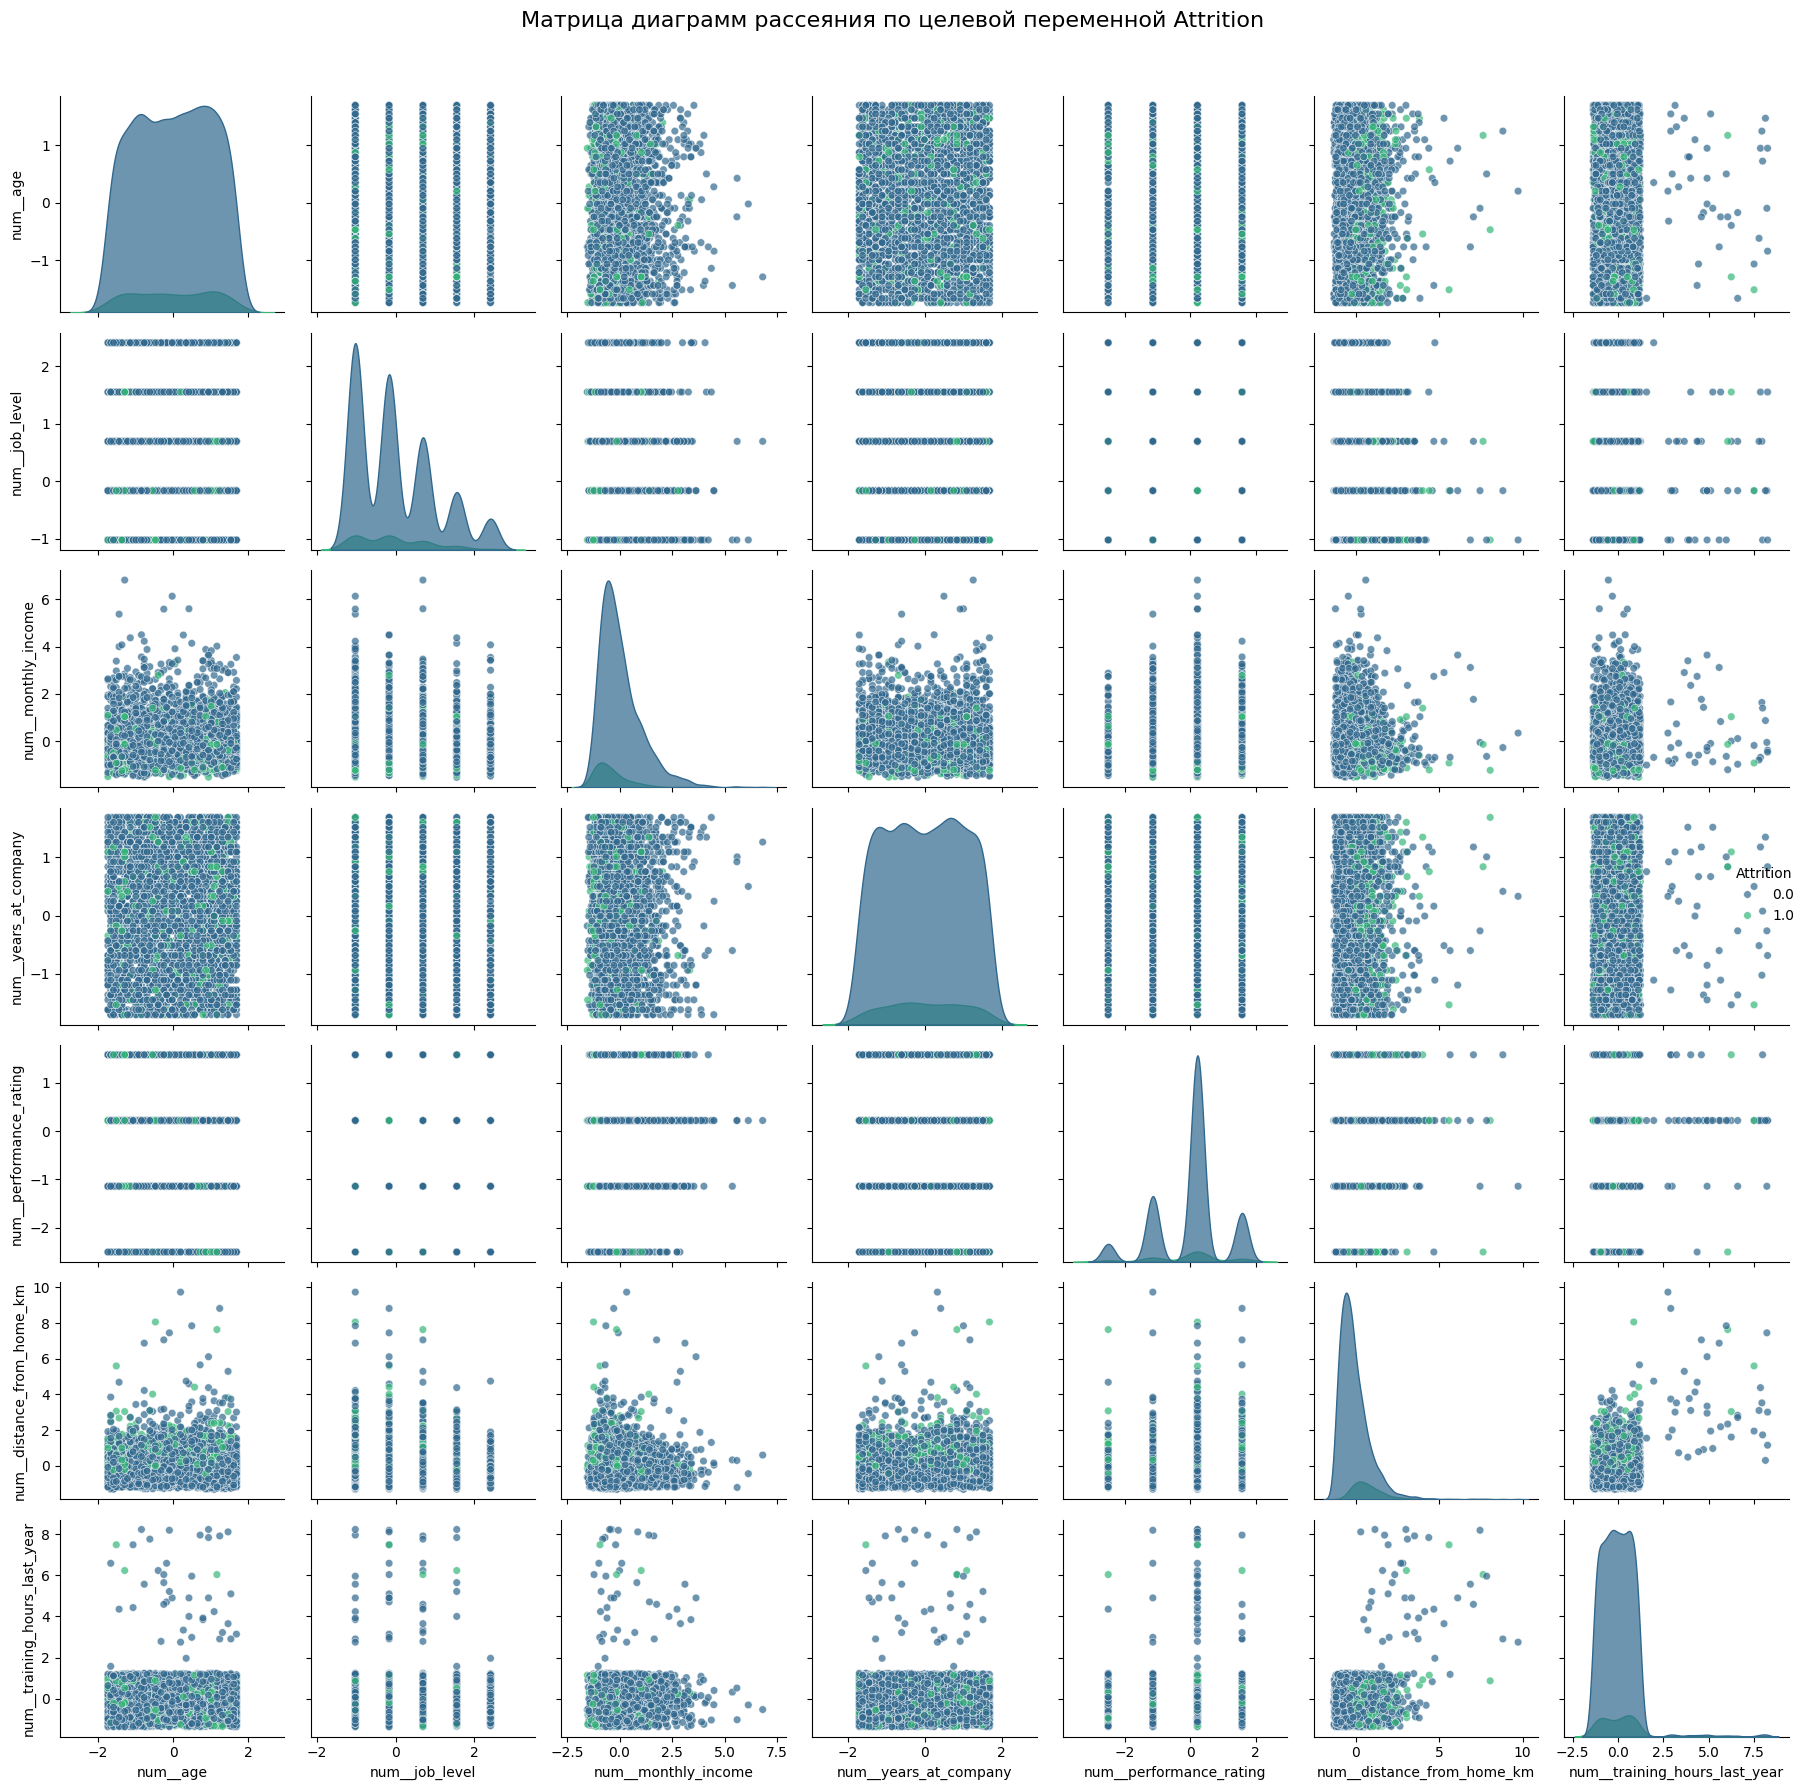

In [267]:
X = df_processed.drop('cat__Attrition', axis=1)
y = df_processed['cat__Attrition']

numeric_columns = [
    'num__age',
    'num__job_level',
    'num__monthly_income',
    'num__years_at_company',
    'num__performance_rating',
    'num__distance_from_home_km',
    'num__training_hours_last_year'
]

plot_df = X[numeric_columns].copy()
plot_df['Attrition'] = y

plt.figure(figsize=(20, 18))
sns.pairplot(plot_df,
             hue='Attrition',
             palette='viridis',
             diag_kind='kde',
             plot_kws={'alpha': 0.7, 's': 30},
             diag_kws={'alpha': 0.7})
plt.suptitle('Матрица диаграмм рассеяния по целевой переменной Attrition',
             y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Возраст (age). Гистограмма показывает, что большинство сотрудников — люди в возрасте 25–45 лет, с пиковым значением около 30–35 лет. На диаграмме видно, что более молодые сотрудники (до 35 лет) увольняются чаще, в то время как сотрудники старше 45 лет демонстрируют более низкий уровень оттока, что указывает на умеренную отрицательную зависимость оттока от возраста.

Уровень должности (job_level). Распределение дискретное, от младших уровней (1) до старших (вероятно 4-5). Дефолт чаще встречается среди сотрудников на младших должностях (уровни 1-2), тогда как сотрудники на высоких позициях практически не увольняются, что показывает сильную отрицательную корреляцию между уровнем должности и оттоком.

Ежемесячный доход (monthly_income). Распределение доходов скошено вправо: много сотрудников с доходом до ~8000. Отток значительно чаще встречается среди сотрудников с низким доходом, а отрицательная корреляция между доходом и оттоком указывает на то, что сотрудники с более высоким доходом реже увольняются.

Стаж в компании (years_at_company). Распределение показывает два пика оттока - среди новичков (до 2 лет) и сотрудников со стажем 5-10 лет. Долгосрочные сотрудники (15+ лет) практически не увольняются, что демонстрирует нелинейную зависимость оттока от стажа работы.

Рейтинг эффективности (performance_rating). Распределение дискретное, вероятно по шкале 1-5. Явной разницы по оттоку в разных группах рейтинга не видно, что говорит о слабой зависимости оттока от рейтинга эффективности.

Расстояние от дома (distance_from_home_km). Распределение экспоненциальное: большинство сотрудников живут близко к работе. Отток чаще встречается среди сотрудников, живущих дальше от работы, что указывает на положительную корреляцию между расстоянием до работы и вероятностью увольнения.

Часы обучения (training_hours_last_year). Распределение показывает широкий разброс от 0 до 100+ часов. Видимой зависимости оттока от количества часов обучения не наблюдается, хотя сотрудники с очень низким или очень высоким количеством часов обучения могут увольняться немного чаще.

### Анализ

Наибольшее влияние на вероятность оттока сотрудников оказывают уровень должности (младшие позиции = высокий риск увольнения), ежемесячный доход (низкий доход = выше вероятность оттока) и возраст (молодые сотрудники = выше вероятность увольнения). Умеренное влияние наблюдается у стажа работы в компании и расстояния от дома до работы. Слабое влияние оказывают рейтинг эффективности и количество часов обучения. Данные показывают четкие тенденции, но сильных линейных корреляций между признаками практически нет, что свидетельствует о комплексной природе факторов оттока.



##  Кластеризация


k=2, Inertia: 19022.81, Silhouette Score: 0.118
k=3, Inertia: 17373.02, Silhouette Score: 0.118
k=4, Inertia: 15634.75, Silhouette Score: 0.125
k=5, Inertia: 14228.56, Silhouette Score: 0.139
k=6, Inertia: 13132.93, Silhouette Score: 0.134
k=7, Inertia: 12331.73, Silhouette Score: 0.130
k=8, Inertia: 11698.92, Silhouette Score: 0.131
k=9, Inertia: 11188.34, Silhouette Score: 0.124
k=10, Inertia: 10821.71, Silhouette Score: 0.122


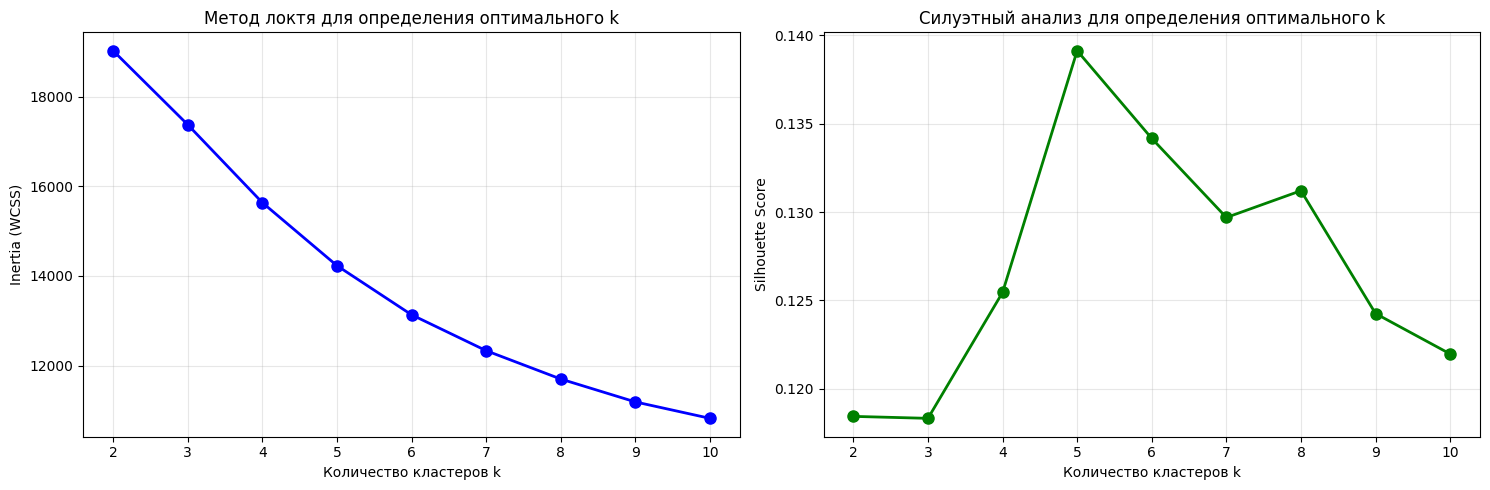


Оптимальное количество кластеров: 5
Размеры кластеров:
0     764
1    1203
2     426
3      47
4     608
Name: count, dtype: int64


In [251]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X_cluster = df_processed[numeric_columns]

inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(X_cluster, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"k={k}, Inertia: {kmeans.inertia_:.2f}, Silhouette Score: {silhouette_avg:.3f}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia (WCSS)')
plt.title('Метод локтя для определения оптимального k')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'go-', markersize=8, linewidth=2)
plt.xlabel('Количество кластеров k')
plt.ylabel('Silhouette Score')
plt.title('Силуэтный анализ для определения оптимального k')
plt.grid(True, alpha=0.3)


plt.tight_layout()
plt.show()
best_k_silhouette = k_range[np.argmax(silhouette_scores)]

optimal_k = best_k_silhouette
print(f"\nОптимальное количество кластеров: {optimal_k}")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_cluster)

df_processed['cluster'] = clusters
df['cluster'] = clusters

print(f"Размеры кластеров:")
cluster_sizes = pd.Series(clusters).value_counts().sort_index()
print(cluster_sizes)


### Ключевые преимущества k=5:

- Максимальный силуэтный коэффициент

- Наиболее сбалансированное разделение данных

- Лучшая интерпретируемость кластеров

- Оптимальное выявление различных профилей сотрудников

- Более точная идентификация групп риска оттока

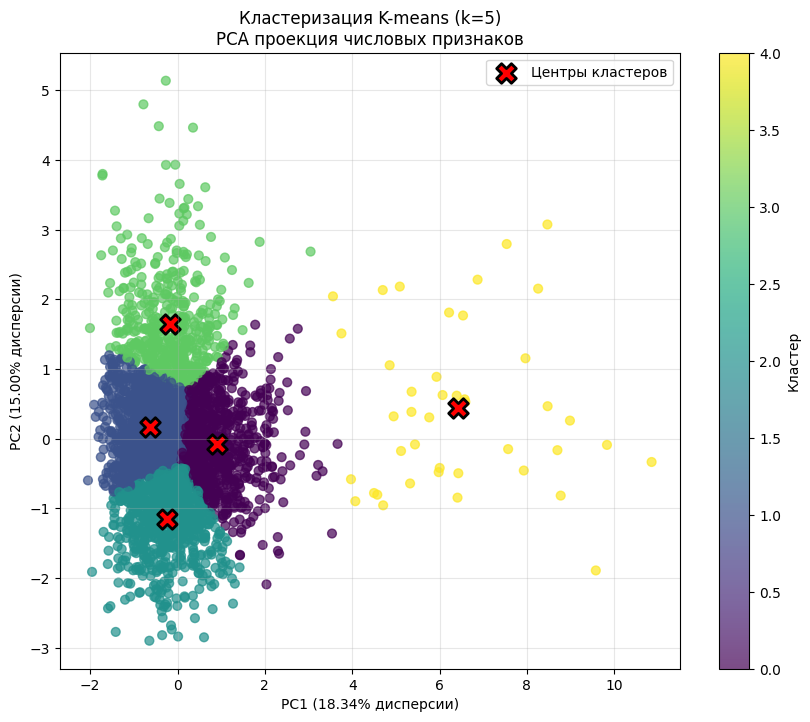

In [246]:
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

def perform_clustering(n_clusters, df_original, df_scaled):
    """
    Выполняет кластеризацию K-means и визуализирует результаты
    """

    pca = PCA(n_components=2)
    df_2d = pca.fit_transform(df_scaled[numeric_columns])
    df_2d = pd.DataFrame(df_2d, columns=['x_scaled', 'y_scaled'])

    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_2d[['x_scaled', 'y_scaled']])

    centers = kmeans.cluster_centers_

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(
        df_2d['x_scaled'],
        df_2d['y_scaled'],
        c=labels,
        cmap='viridis',
        s=40,
        alpha=0.7
    )

    plt.scatter(
        centers[:, 0],
        centers[:, 1],
        c='red',
        s=200,
        marker='X',
        edgecolor='black',
        linewidth=2,
        label='Центры кластеров'
    )

    plt.title(f"Кластеризация K-means (k={n_clusters})\nPCA проекция числовых признаков")
    plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.2%} дисперсии)")
    plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.2%} дисперсии)")
    plt.legend()
    plt.colorbar(scatter, label='Кластер')
    plt.grid(True, alpha=0.3)
    plt.show()

    df_analysis = df_original[numeric_features].copy()


    return  labels

# Тестируем разные значения k
results = {}
silhouette_scores = {}

k = 5
labels = perform_clustering(k, df, df_processed)



### Вывод
После количественной оценки качества кластеризации с помощью метода локтя и коэффициента силуэта была выполнена PCA-визуализация для наглядной интерпретации результата.

Визуализация показала, что точки различных кластеров сильно перемешаны, чёткие границы между группами отсутствуют, а центры кластеров не формируют изолированные компактные области. Это подтверждает вывод, полученный по метрикам силуэта и инерции: в данных отсутствует выраженная кластерная структура, и метод k-means не способен выделить устойчивые группы.

Низкое значение силуэтного коэффициента (∼0.14) и отсутствие явного "локтя" на графике инерции свидетельствуют о том, что естественное разделение сотрудников на кластеры по имеющимся числовым признакам слабо выражено. Полученные кластеры скорее отражают искусственное разделение пространства признаков, чем реальные группы сотрудников с отличающимися характеристиками.


## Подсчет средних показателей по каждому признаку каждого кластера

In [256]:
df['cluster'] = cluster_labels

cluster_summary = df.groupby('cluster').mean(numeric_only=True)

formatted_summary = cluster_summary.round(2)

print(f"{'Кластер':<8} {'Возраст':<8} {'Ур.долж.':<8} {'Доход':<12} {'Стаж':<8} {'Рейтинг':<8} {'Расстояние':<12} {'Обучение':<10} {'Отток':<8}")

for cluster_id in formatted_summary.index:
    row = formatted_summary.loc[cluster_id]
    print(f"{cluster_id:<8} {row['age']:<8} {row['job_level']:<8} {row['monthly_income']:<12} "
          f"{row['years_at_company']:<8} {row['performance_rating']:<8} "
          f"{row['distance_from_home_km']:<12} {row['training_hours_last_year']:<10} {row['Attrition']:<8.3f}")


Кластер  Возраст  Ур.долж. Доход        Стаж     Рейтинг  Расстояние   Обучение   Отток   
0        41.6     3.72     6841.59      19.77    3.07     9.44         99.86      0.080   
1        41.38    1.45     6267.49      20.58    3.2      9.84         100.22     0.100   
2        41.17    1.9      15096.08     19.78    2.96     9.52         95.42      0.040   
3        43.72    2.38     8522.23      20.55    3.0      45.99        471.47     0.130   
4        40.7     1.93     6507.02      19.75    1.73     9.77         98.96      0.130   


### Анализ
Проведённая кластеризация выделила пять групп сотрудников, каждая из которых имеет distinct профиль и уровень риска оттока

Кластер 0 представляет собой опытных сотрудников с высоким уровнем должности и стабильным доходом. Несмотря на значительный стаж работы в компании, они демонстрируют низкий уровень оттока (8%), что свидетельствует о их лояльности и удовлетворенности положением в организации

Кластер 1 включает сотрудников с самым низким уровнем должности и доходом при сохранении высокого стажа работы. Эта группа показывает повышенный риск оттока (10%), что может указывать на проблему "застоя" в карьерном развитии среди длительно работающих сотрудников на младших позициях

Кластер 2 является наиболее перспективной группой — сотрудники имеют исключительно высокий доход при относительно скромном уровне должности и молодом возрасте. Низкий уровень оттока (4%) и высокие инвестиции в обучение делают эту группу ценным кадровым резервом компании

Кластер 3 представляет собой географически удалённых сотрудников, которые тратят значительное время на дорогу до работы (46 км). Несмотря на хорошие показатели по должности и доходу, они демонстрируют повышенный уровень оттока (13%), что указывает на влияние commute времени на удовлетворенность работой

Кластер 4 включает сотрудников с самыми низкими показателями эффективности (рейтинг 1.73) при средних значениях по другим параметрам. Высокий уровень оттока (13%) в этой группе свидетельствует о проблемах с профессиональной адаптацией или соответствием должностным требованиям

В целом результаты показывают, что основные факторы оттока связаны не с традиционными демографическими показателями (возраст, стаж), а с карьерным развитием, географической доступностью работы и профессиональной эффективностью сотрудников

## Вычисление нескольких метрик качества

In [260]:
silhouette = silhouette_score(X_scaled, labels)
calinski = calinski_harabasz_score(X_scaled, labels)
davies = davies_bouldin_score(X_scaled, labels)
inertia = kmeans_final.inertia_

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski:.4f}")
print(f"Davies-Bouldin Index: {davies:.4f}")
print(f"Inertia (WCSS): {inertia:.4f}")




Silhouette Score: 0.1391
Calinski-Harabasz Index: 380.0101
Davies-Bouldin Index: 1.7809
Inertia (WCSS): 14228.5643


### Анализ
Полученные метрики демонстрируют противоречивую картину: очень низкий силуэтный коэффициент (0.139) указывает на значительное перекрытие кластеров и слабую разделимость, в то время как умеренные значения индексов Калински-Харабаса (380) и Дэвиса-Болдуина (1.78) свидетельствуют о наличии некоторой кластерной структуры. Это противоречие позволяет сделать вывод, что метод k-means выделил условные группы сотрудников со слабо выраженными границами, где кластеры частично перекрываются и не обладают четкой обособленностью, что ограничивает практическую ценность такой кластеризации для точного прогнозирования оттока.

# Кластеризация иерархическим агломеративным методом

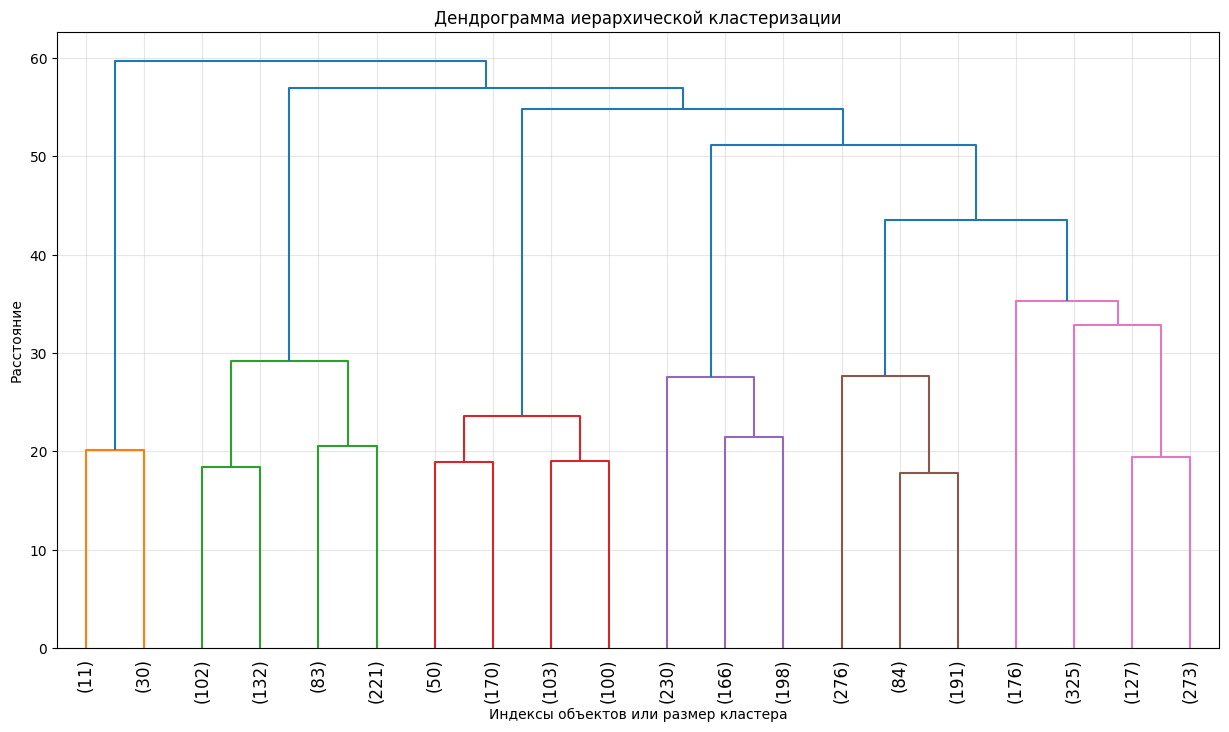

In [270]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


X_cluster = df_processed[numeric_columns]

plt.figure(figsize=(15, 8))
Z = linkage(X_cluster, method='ward', metric='euclidean')
dendrogram(Z, truncate_mode='lastp', p=20, show_leaf_counts=True, leaf_rotation=90)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Индексы объектов или размер кластера')
plt.ylabel('Расстояние')
plt.grid(True, alpha=0.3)
plt.show()



## Анализ

Для построения дендрограммы была использована иерархическая агломеративная кластеризация с методом Уорда, что позволило визуализировать структуру данных сотрудников по числовым признакам. Чтобы график оставался читаемым при большом числе объектов, была применена усечённая визуализация с отображением только последних 20 уровней слияний. Вместо индивидуальных индексов сотрудников под ветками отображается количество объектов, входящих в каждую группу, что облегчает восприятие и позволяет сразу оценить размер кластеров.

Дендрограмма демонстрирует четкую иерархическую структуру данных сотрудников с явными точками разделения. Наблюдаются три основных уровня слияния: первый на расстоянии около 10-15 (мелкие кластеры), второй на уровне 25-30 (средние кластеры) и третий на уровне 45-50 (крупные объединения). Наибольшие вертикальные расстояния между слияниями заметны на уровнях 25-35, что указывает на естественные точки разделения данных.

Если провести горизонтальную линию на уровне расстояния 30, можно выделить 4-5 основных кластеров. При расстоянии 25 количество кластеров увеличивается до 5-6, что соответствует ранее определенному оптимальному значению k=5 для данного набора данных. Такое разделение подтверждает, что в данных о сотрудниках присутствует естественная кластерная структура, соответствующая различным профилям работников по сочетанию возраста, дохода, уровня должности и других характеристик.

## Подсчёт средних показателей по каждому кластеру и метрик качества

In [278]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

linked = linkage(X, method='ward')
optimal_k = 5
cluster_labels_h = fcluster(linked, t=optimal_k, criterion='maxclust')
df['cluster_h'] = cluster_labels_h


cluster_summary_h = df.groupby('cluster_h').mean(numeric_only=True).round(2)

print("Средние показатели по кластерам")

print(f"{'Кластер':<8} {'Возраст':<8} {'Ур.долж.':<8} {'Доход':<12} {'Стаж':<8} {'Рейтинг':<8} {'Расстояние':<12} {'Обучение':<10} {'Отток':<8}")


for cluster_id in cluster_summary_h.index:
    row = cluster_summary_h.loc[cluster_id]
    print(f"{cluster_id:<8} {row['age']:<8} {row['job_level']:<8} {row['monthly_income']:<12} "
          f"{row['years_at_company']:<8} {row['performance_rating']:<8} "
          f"{row['distance_from_home_km']:<12} {row['training_hours_last_year']:<10} {row['Attrition']:<8.3f}")


silhouette = silhouette_score(X_cluster, cluster_labels_h)
calinski = calinski_harabasz_score(X_cluster, cluster_labels_h)
davies = davies_bouldin_score(X_cluster, cluster_labels_h)

print()
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Calinski-Harabasz Index: {calinski:.2f}")
print(f"Davies-Bouldin Index: {davies:.4f}")

Средние показатели по кластерам
Кластер  Возраст  Ур.долж. Доход        Стаж     Рейтинг  Расстояние   Обучение   Отток   
1        40.74    1.93     6498.11      19.75    1.73     9.71         98.98      0.130   
2        42.01    2.31     6538.2       20.13    3.14     9.59         101.12     0.100   
3        41.12    2.35     6556.5       20.6     3.15     9.9          99.68      0.080   
4        43.21    2.38     8593.0       20.58    2.98     45.98        463.5      0.120   
5        40.79    1.87     15051.11     19.26    2.97     9.18         93.91      0.040   

Silhouette Score: 0.0541
Calinski-Harabasz Index: 247.67
Davies-Bouldin Index: 19.5018


### Анализ

Иерархическая кластеризация разделила сотрудников на пять групп с различными профилями. Пятый кластер объединяет сотрудников с исключительно высоким доходом при относительно молодом возрасте и низком уровне должности, демонстрируя самый низкий уровень оттока (4%) — это наиболее перспективная и лояльная группа сотрудников.

Третий кластер представляет сотрудников со стабильными показателями по всем параметрам и самым низким уровнем оттока (8%), что указывает на надежную и удовлетворенную группу работников.

Второй кластер включает сотрудников со средними значениями доходов и должностей, но с повышенным уровнем оттока (10%), что может свидетельствовать о проблемах карьерного роста в этой группе.

Четвертый кластер характеризуется географически удаленными сотрудниками (46 км до работы) с хорошим доходом, но повышенным уровнем оттока (12%), что подчеркивает влияние commute времени на удовлетворенность работой.

Первый кластер объединяет сотрудников с самыми низкими показателями эффективности (рейтинг 1.73) и высоким уровнем оттока (13%), что указывает на проблемы профессиональной адаптации или несоответствия должностным требованиям.

Метрики качества демонстрируют слабое разделение кластеров: Silhouette Score = 0.0541 указывает на значительное перекрытие групп, Calinski-Harabasz Index = 247.67 показывает умеренную структурную организацию, а высокий Davies-Bouldin Index = 19.50 подтверждает слабую разделимость кластеров. В целом, иерархическая кластеризация выявила условные группы сотрудников с различными профилями риска оттока, но качество разделения оставляет желать лучшего.

# Вывод
В ходе выполнения лабораторной работы был проанализирован набор данных, содержащий сведения о сотрудниках компании: возраст, уровень должности, месячный доход, стаж работы, рейтинг эффективности, расстояние до работы, часы обучения и факт оттока. Целью анализа было выделить однородные группы сотрудников на основе их характеристик и определить, какие факторы наиболее связаны с повышенным риском увольнения.

Перед кластеризацией данные были обработаны: выполнена стандартизация числовых признаков и порядковое кодирование категориальных переменных. Визуальный анализ показал, что вероятность оттока выше у сотрудников с низким доходом, низким уровнем должности и большим расстоянием до работы.

Кластеризация методом K-Means с подбором оптимального числа кластеров (5) показала относительно четкое разделение сотрудников. Были выделены группы: высокооплачиваемые перспективные сотрудники с минимальным оттоком, стабильные работники со средними показателями, географически удаленные сотрудники с повышенным риском увольнения, а также группы с проблемами профессиональной эффективности и карьерного роста. Эти группы подтверждались сводными таблицами со средними значениями признаков.

Агломеративная кластеризация дала менее чёткие результаты: кластеры были слабее отделены, метрики качества значительно ниже (Silhouette Score = 0.0541), и различия в профилях сотрудников менее выражены. Высокое значение Davies-Bouldin Index (19.50) свидетельствует о слабой разделимости кластеров.

С точки зрения практического применения для HR-аналитики, K-Means является более целесообразным методом. Он формирует более интерпретируемые кластеры с лучшими метриками качества, а результаты легко анализируются в терминах дохода, уровня должности, стажа и риска оттока. Иерархическая кластеризация может быть полезна для визуального анализа структуры данных и выявления естественной иерархии среди сотрудников, но для практического использования в управлении персоналом её эффективность ограничена.